# 6-1. 프로젝트: 고양이 수염 스티커 만들기
- Step 1. 스티커 구하기 or 만들기
- Step 2. 얼굴 검출 & 랜드마크 검출 하기
    > 오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark 위치를 찾아보아요
- Step 3. 스티커 적용 위치 확인하기
    > 코끝은 33번, 입숙 가운데 위 점은 51번
- Step 4. 스티커 적용하기
    > cv2.addWeighted() 참고해보기
- Step 5. 문제점 찾아보기
    > (1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.
    > (2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

> TMI
    >> 몬생긴 저으 사진보다는 백암선생의 잘생긴 얼굴을 보고 가세요

In [1]:
# 패키지 임포트
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("Done import modules..")

Done import modules..


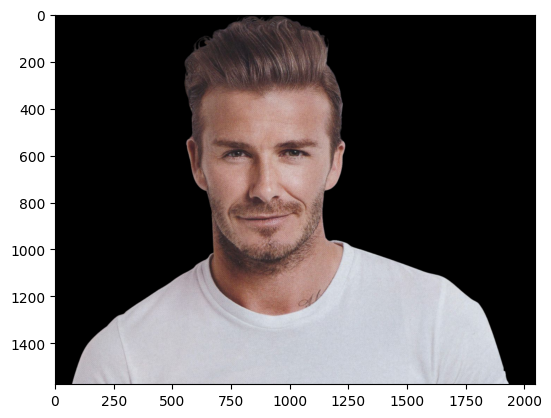

In [2]:
# 준비한 이미지 읽기
# 퀘스트 repo 기준 파일 경로
my_image_path = './camera_sticker/images/backham_frontview.png'
# 불러온 이미지 데이터
img_bgr = cv2.imread(my_image_path)
# 출력용 이미지 따로 보관
img_show = img_bgr.copy()
# dlib 사용하기 위해 RGB 채널 변경
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 이미지 출력준비
plt.imshow(img_rgb)
# 이미지 확인
plt.show()

rectangles[[(603, 480) (1157, 1035)]]


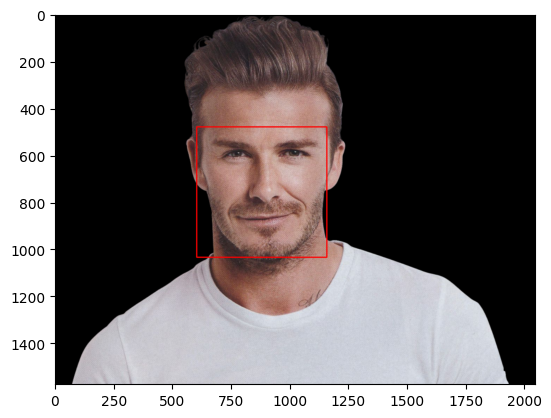

In [3]:
# Face detection --> bounding box
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

# 찾은 얼굴의 영역 박스 리스트
print(dlib_rects)

# 찾은 얼굴 영역들의 bounding box 점 정보를 순회해서 획득
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    # 시작점 좌표와 종료점 좌표로 직각 사각형 그리기
    cv2.rectangle(img_show, (l, t), (r, b), (0, 0, 255), 4, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# bounding box 씌운 이미지 확인하기
plt.imshow(img_show_rgb)
plt.show()

In [4]:
# landmark 모델 불러오기
# 퀘스트 repo 기준 path
model_path = './camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("모델 불렀으!")

모델 불렀으!


In [5]:
# 모든 얼굴의 랜드마크(full object detection) 과정 수행
## 랜드마크 위치 저장할 list
list_landmakrs = []

# 얼굴 영역 박스마다 face landmark 찾기
for dlib_rect in dlib_rects:
    # 모든 랜드마크 위치정보
    points = landmark_predictor(img_rgb, dlib_rect)
    # 각 랜드마크 위치정보를 (x,y)로 변환하여 리스트 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmakrs.append(list_points)

# 불러온 모델이 가지고 있는 랜드마크 개수 확인
print(len(list_landmakrs[0]))

68


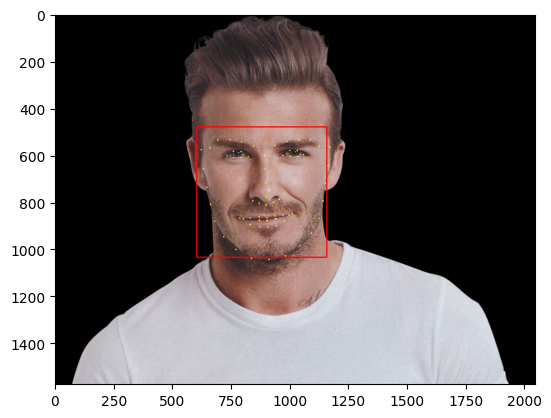

In [6]:
# 얼굴 이미지에 랜드마크 정보도 같이 띄우기
for landmark in list_landmakrs:
    for point in landmark:
        cv2.circle(img_show, point, 3, (0, 255, 255), -1)

# RGB 이미지로 변환
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 이미지 출력하여 확인
plt.imshow(img_show_rgb)
plt.show()

# 고양이 수염을 붙여보자
1. 스티커 위치 생각해보기
    $$ x = x_{nose} $$
    $$ y = y_{nose} $$
2. 스티커 크기 생각해보기
    $$ width = height = width_{bbox} $$

In [7]:
# 좌표값 확인해보기

for dlib_rect, landmark in zip(dlib_rects, list_landmakrs):
    # 고양이 수염 가운데 부분을 코 중심점에 맞추면 그럴듯하므로
    # 결국 노드 코드 내용을 따라가는것 같다.
    print(f"코 IDX: {landmark[30]}")

    # 수염 이미지 넓이와 높이
    w = h = dlib_rect.width()
    
    # 수염 이미지 그려질 x 값
    x = landmark[30][0]
    # 수염 이미지 그려질 y 값
    y = landmark[30][1]
    

    print(f"(x, y) : ({x}, {y})")
    print((f"(w, h) : ({w}, {h})"))


코 IDX: (900, 777)
(x, y) : (900, 777)
(w, h) : (555, 555)


In [8]:
# 스티커 이미지 읽어서 resize 하고 차원확인하기
# 노드 기준 왕관 이미지 예시
# sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'

# 퀘스트 repo 기준 고양이 수염 이미지 예시
sticker_path = './camera_sticker/images/cat-whiskers.png'

# 스티커 이미지 불러오기
img_sticker = cv2.imread(sticker_path)
# 스티커 이미지 조정
img_sticker = cv2.resize(img_sticker, (w, h))

# 사이즈 조정한 수염 이미지 차원 확인
print(img_sticker.shape)

(555, 555, 3)


In [9]:
# 원본 이미지에 스티커 이미지 추가

# 스티커 이미지 그려질 위치 조절 좌표값;
# x는 코 중심점의 x고 refined_x는 스티커 이미지가 그려지기 시작할 위치 값
refined_x = x - w // 2
# y는 코 중심점의 y고 refined_y는 스티커 이미지가 그려지기 시작할 위치 값
refined_y = y - w // 2

print(f"(x, y) : ({refined_x}, {refined_y})")

(x, y) : (623, 500)


In [10]:
# 기존 노드(음수값 처리)를 사용해보기
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print(f"(x, y) : ({refined_x}, {refined_y})")

(x, y) : (623, 500)


In [11]:
# 원본 이미지에 스티커 적용해보기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 스티커 이미지 적용해보기
## 기존 노드 방식, 이미지가 그대로 붙어짐
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)


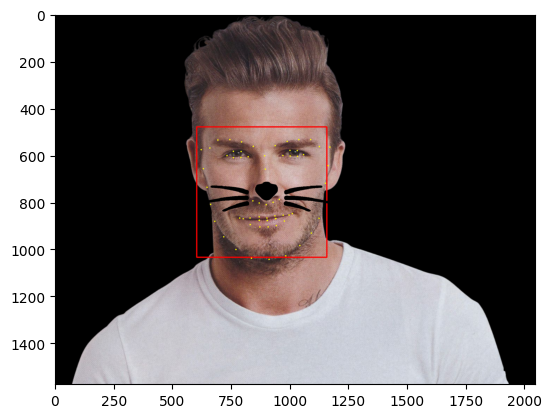

In [12]:
# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()
## 기존 방식대로 합성하니 스티커 이미지의 투명한 부분이 흰색으로 처리되어 버리는 점이 발견된다...

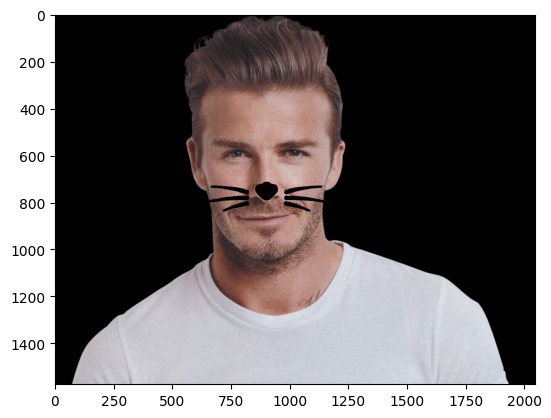

In [13]:
# bounding box와 landmark 제거하고 결과 출력해보기
# 스티커 이미지
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


## 헷갈렷던 부분 기록..
> np.where(condition, if condition is True here, if condition is False here)
>> 각 부분에 넣어야하는 변수의 정확한 의미를 알아야 잘못넣지 않게 된다.

> refined_x, refined_y를 설정할 때,
>> 이 값은 결국 스티커 이미지를 그릴 때, 스티커 이미지 기준 0,0이 될 위치

> w, h 구할때 해당 값들의 범위가 어떻게 설정되는지 이해가 더 되어야 이상한 이미지 shifting이나 이미지 늘어짐 같은 것들이 없다.

## 추가로 생각해볼만한 부분
> landmark_predictor = dlib.shape_predictor(model_path)
>> 이 함수는 결국 모델의 랜드마크를 부르는데, 정면 사진에 대해서 잘 찾을거라고 이해됨
>> 만약 가지고 있는 이미지(`backham_sideseeing.png`)처럼 정면이 아닌 경우에는 다른 함수를 쓸거 같은데 확인해봐야 함.

>> CNN, DNN 개념이 적용된 detector에서 처리가 가능한것 같다.
[링크](https://velog.io/@easttwave/Deep-Learning-얼굴-인식-모델-비교-조사)